# 문제 1. 표본조사 체험하기


### 📘 문제

- 온라인 쇼핑몰은 전체 고객 수가 너무 많아, 모든 고객을 조사하기 어렵습니다.

- 그래서 무작위로 고객 30명을 뽑아 평균 만족도를 계산하고 이를 전체 만족도의 추정값으로 사용하려 합니다.

- 이번 실습에서는 직접 표본을 뽑고, 표본 평균을 구해보며,
  **“표본마다 결과가 달라질 수 있다”**는 추론 통계의 핵심 개념을 체험해봅니다.


### 📌 아래를 수행해 보세요:

- 표본을 무작위로 여러 번 뽑아 보고, 표본 평균이 어떻게 변하는지 확인해봅시다.

- 히스토그램을 그리고, 표본 평균의 분포 형태를 관찰해봅시다.


In [1]:
# 파이썬 라이브러리 및 모듈 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'AppleGothic'  # 맥북 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호 깨짐 방지

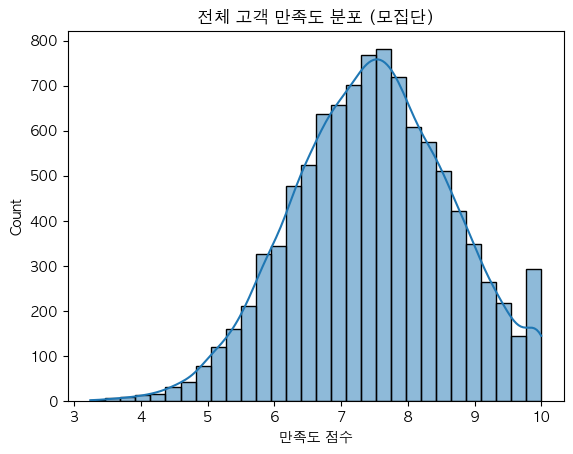

In [2]:
# 모집단 생성 (전체 고객 만족도 10,000명)
np.random.seed(2025)
population = np.random.normal(loc=7.5, scale=1.2, size=10000)
population = np.clip(population, 1, 10)  # 1점 ~ 10점 사이로 제한
df_pop = pd.DataFrame({'score': population})

# 전체 모집단 시각화
sns.histplot(df_pop['score'], bins=30, kde=True)
plt.title("전체 고객 만족도 분포 (모집단)")
plt.xlabel("만족도 점수")
plt.show()

In [3]:
# Q1. 모집단에서 무작위로 30명을 뽑아 표본 평균을 구해봅시다.
sample = df_pop.sample(n=30, random_state=2025)
sample_mean = sample['score'].mean()
print(f"표본 30명의 평균 만족도: {sample_mean:.2f}")

# 여기에 코드 작성

표본 30명의 평균 만족도: 7.40


In [4]:
# Q2. 이 과정을 500번 반복하고, 표본 평균을 리스트에 저장합니다.
sample_means = []
for i in range(500):
    sample = df_pop.sample(n=30)
    sample_means.append(sample['score'].mean())

# 여기에 코드 작성

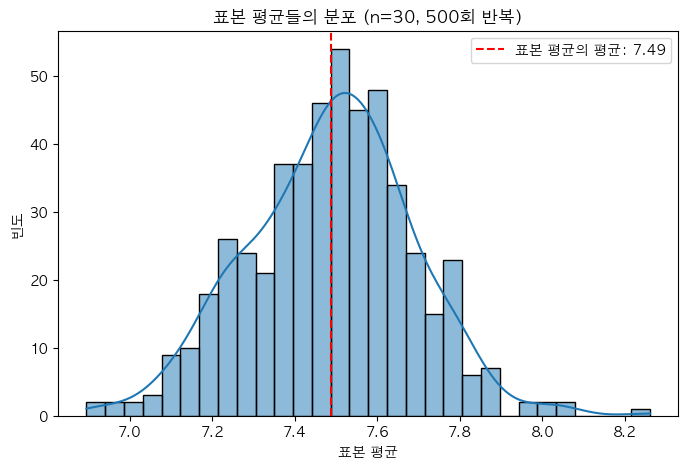

In [5]:
# Q3. 표본 평균들의 분포를 히스토그램으로 그리고, 평균선도 함께 표시해 봅시다.
plt.figure(figsize=(8, 5))
sns.histplot(sample_means, bins=30, kde=True)
plt.axvline(np.mean(sample_means), color='red', linestyle='--', label=f"표본 평균의 평균: {np.mean(sample_means):.2f}")
plt.title("표본 평균들의 분포 (n=30, 500회 반복)")
plt.xlabel("표본 평균")
plt.ylabel("빈도")
plt.legend()
plt.show()

# 여기에 코드 작성

### 🧠 데이터를 어떻게 읽을까요?

- 표본 평균들은 어떤 값 주변에 많이 분포해 있나요? 이 값은 전체 모집단 평균과 얼마나 비슷한가요?

- 표본을 1번 뽑았을 때와 500번을 반복해서 뽑았을 때, 표본 평균의 분포나 신뢰성에는 어떤 차이가 있나요

- 친구가 다른 표본을 뽑았다면 같은 평균이 나왔을까요? 비슷한 결과가 나왔더라도 완전히 같지 않았다면, 그 이유는 무엇일까요?

- 표본 평균들의 분포는 어떤 모양인가요? 종 모양의 정규분포처럼 보이나요? 그렇다면 왜 그렇게 되는 걸까요?


# 문제 2. 중심극한정리


### 📘 문제

- 현실에서는 모집단의 분포가 정규분포가 아닐 수도 있습니다.

- 예를 들어, 일부 고객은 매우 높은 점수를 주고, 대부분은 낮은 점수를 주는 만족도 분포가 있을 수 있죠. (예: 지수분포)

- 이처럼 원래 분포가 비정규분포여도,
  표본을 여러 번 뽑아 평균을 계산하면, 그 평균들의 분포는 정규분포에 가까워진다는 것을
  **중심극한정리(Central Limit Theorem)**라고 합니다.

- 이번 실습에서는 다양한 크기의 표본을 뽑아 평균을 계산하고,
  그 평균들의 분포가 어떻게 변하는지를 직접 실험해 봅니다.


### 📌 아래를 수행해 보세요:

- 비대칭적인 모집단(지수분포)에서 무작위로 표본을 추출해 평균을 구해봅시다.

- 표본 크기를 바꿔가며, 표본 평균들의 분포가 어떻게 변화하는지 확인해봅시다.

- 히스토그램을 그리고, 분포의 모양을 관찰해봅시다.

- 표본 크기가 커질수록 표본 평균 분포의 모양과 **퍼진 정도(분산)**가 어떻게 변하는지 관찰해봅시다.


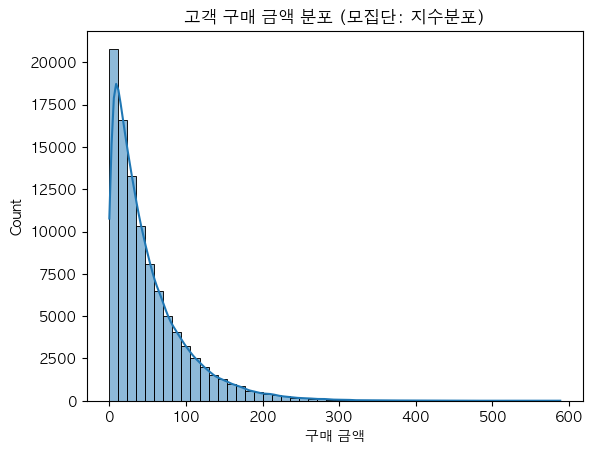

In [6]:
# 지수분포를 따르는 모집단 생성
np.random.seed(2025)
population = np.random.exponential(scale=50, size=100000)  # 평균 50, 비대칭 분포

# 모집단 시각화
sns.histplot(population, bins=50, kde=True)
plt.title("고객 구매 금액 분포 (모집단: 지수분포)")
plt.xlabel("구매 금액")
plt.show()

In [7]:
# Q1. 모집단에서 표본을 1000번 뽑고, 각 표본의 평균을 구해봅시다.
# 표본 크기 = 5일 때

sample_size = 5
n_samples = 1000

sample_means_5 = []

for _ in range(n_samples):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_means_5.append(np.mean(sample))

sample_means_5 = np.array(sample_means_5)

# 여기에 코드 작성

In [8]:
# Q2. 위 과정을 표본 크기 30, 100일 때도 반복해봅시다.

# 표본 크기 30일 때
sample_size_30 = 30
sample_means_30 = []

for _ in range(n_samples):
    sample = np.random.choice(population, size=sample_size_30, replace=False)
    sample_means_30.append(np.mean(sample))

sample_means_30 = np.array(sample_means_30)

# 표본 크기 100일 때
sample_size_100 = 100
sample_means_100 = []

for _ in range(n_samples):
    sample = np.random.choice(population, size=sample_size_100, replace=False)
    sample_means_100.append(np.mean(sample))

sample_means_100 = np.array(sample_means_100)

# 여기에 코드 작성

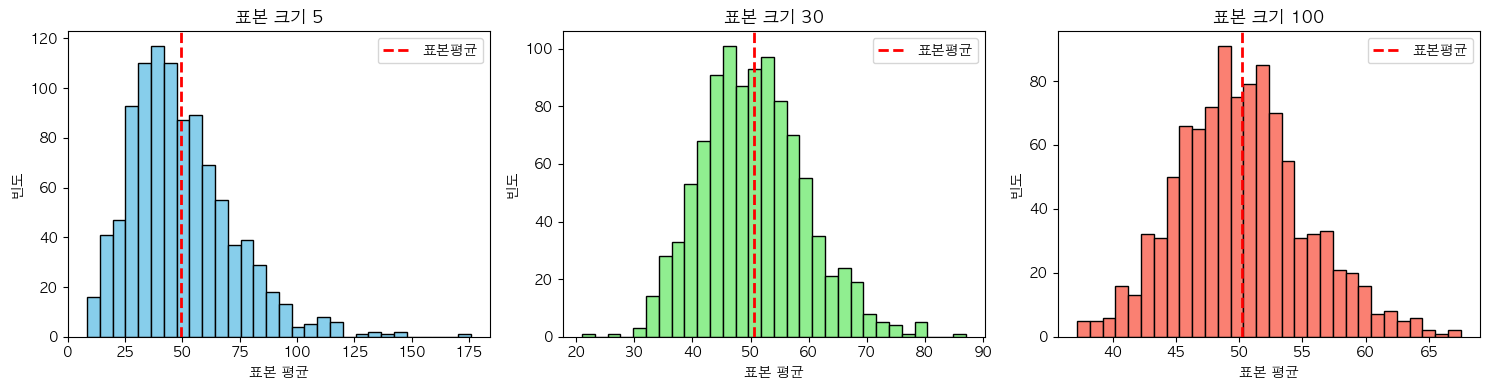

In [9]:
# Q3. 각 표본 크기별로 표본 평균들의 분포를 히스토그램으로 그려봅시다.
# 평균선을 함께 표시해 봅시다.

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))

# 표본 크기 5
plt.subplot(1, 3, 1)
plt.hist(sample_means_5, bins=30, color='skyblue', edgecolor='black')
plt.axvline(np.mean(sample_means_5), color='red', linestyle='dashed', linewidth=2, label='표본평균')
plt.title('표본 크기 5')
plt.xlabel('표본 평균')
plt.ylabel('빈도')
plt.legend()

# 표본 크기 30
plt.subplot(1, 3, 2)
plt.hist(sample_means_30, bins=30, color='lightgreen', edgecolor='black')
plt.axvline(np.mean(sample_means_30), color='red', linestyle='dashed', linewidth=2, label='표본평균')
plt.title('표본 크기 30')
plt.xlabel('표본 평균')
plt.ylabel('빈도')
plt.legend()

# 표본 크기 100
plt.subplot(1, 3, 3)
plt.hist(sample_means_100, bins=30, color='salmon', edgecolor='black')
plt.axvline(np.mean(sample_means_100), color='red', linestyle='dashed', linewidth=2, label='표본평균')
plt.title('표본 크기 100')
plt.xlabel('표본 평균')
plt.ylabel('빈도')
plt.legend()

plt.tight_layout()
plt.show()

# 여기에 코드 작성

### 🧠 데이터를 어떻게 읽을까요?

- 표본 크기가 작을 때 (예: 5), 평균들의 분포는 어떤 모양인가요?

- 표본 크기가 커질수록 평균 분포의 모양은 어떤 변화를 보이나요?

- 원래 모집단은 비대칭이었는데, 왜 평균들의 분포는 정규분포처럼 바뀌었을까요?

- 이 실험을 통해 중심극한정리를 어떻게 이해하게 되었나요?

- 표본 크기에 따라 **분포의 넓이(흩어짐)**는 어떻게 달라지나요?


# 문제 3. 표본오차


### 📘 문제

- 표본을 뽑아 평균을 계산할 때마다 결과가 달라지는 이유는 바로 **표본마다 오차(흩어짐)**가 있기 때문입니다.

- 표본 평균들이 얼마나 흩어져 있는지를 나타내는 표준편차를 특별히 **표본오차(Standard Error)**라고 부릅니다.

- 이 표본오차의 크기는 **표본의 크기(n)**에 따라 달라지며, 이는 SE = σ / √n (모집단 표준편차 / 루트 n) 이라는 공식으로 계산할 수 있습니다.

- 즉, 표본 크기가 커질수록 표본오차는 작아집니다.

- 이번 실습에서는 여러 크기의 표본을 뽑아, 실제 표본 평균들의 표준편차(실험값)가 공식으로 계산한 표본오차(이론값)와 얼마나 일치하는지 직접 확인해봅니다.


### 📌 아래를 수행해 보세요:

- 모집단에서 여러 크기의 표본(10, 30, 100, 500)을 각각 1000번 뽑고,
  그 평균들을 구한 뒤, **표본 평균의 표준편차(=표본오차)**를 비교해봅시다.

- 이 결과를 표로 정리하고, 시각화해봅시다.


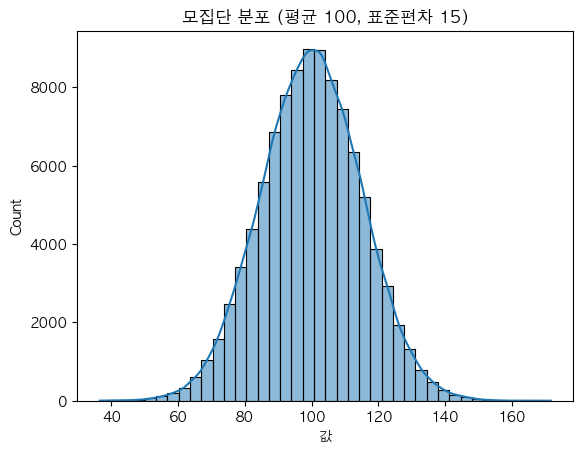

In [10]:
# 모집단 생성 (평균 100, 표준편차 15)
np.random.seed(2025)
population = np.random.normal(loc=100, scale=15, size=100000)

# 모집단 시각화
sns.histplot(population, bins=40, kde=True)
plt.title("모집단 분포 (평균 100, 표준편차 15)")
plt.xlabel("값")
plt.show()


In [11]:
# 표본 크기 10, 30, 100, 500에 대해 각각 1000번씩 표본을 뽑아 평균을 구하고,
# 각 표본 평균 분포의 표준편차(실험값)를 계산한 뒤, 결과를 리스트와 표로 정리합니다.

sample_sizes = [10, 30, 100, 500]
n_samples = 1000

sample_means_std = []  # 표본 평균의 표준편차(실험값) 저장 리스트

for n in sample_sizes:
    means = []
    for _ in range(n_samples):
        sample = np.random.choice(population, size=n, replace=False)
        means.append(np.mean(sample))
    std_of_means = np.std(means, ddof=1)  # 표본 평균의 표준편차
    sample_means_std.append(std_of_means)

# 결과를 표로 정리
import pandas as pd

result_df = pd.DataFrame({
    '표본크기': sample_sizes,
    '표본평균의 표준편차(실험값)': sample_means_std
})

display(result_df)

# 여기에 코드 작성

,표본크기,표본평균의 표준편차(실험값)
0,10,4.659081
1,30,2.786076
2,100,1.526038
3,500,0.663386


In [12]:
# Q2. 이론적인 표준오차와 비교해봅시다.
# [공식] 표본오차(SE) = 모집단 표준편차 / √표본크기

# 모집단 표준편차 계산
population_std = np.std(population, ddof=0)

# 이론적인 표본오차(SE) 계산
theoretical_se = [population_std / np.sqrt(n) for n in sample_sizes]

# 결과를 표로 정리
result_df['표본오차(이론값)'] = theoretical_se

display(result_df)

# 여기에 코드 작성

,표본크기,표본평균의 표준편차(실험값),표본오차(이론값)
0,10,4.659081,4.753921
1,30,2.786076,2.744677
2,100,1.526038,1.503322
3,500,0.663386,0.672306


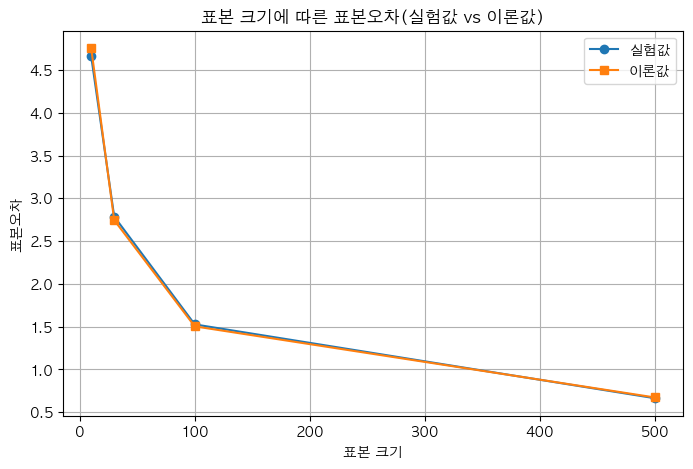

In [13]:
# Q3. 실험값과 이론값을 시각화해봅시다.
# 표본 크기를 x축, 표본오차(실험값, 이론값)를 y축으로 한 꺾은선 그래프를 그려봅시다.

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(result_df['표본크기'], result_df['표본평균의 표준편차(실험값)'], marker='o', label='실험값')
plt.plot(result_df['표본크기'], result_df['표본오차(이론값)'], marker='s', label='이론값')
plt.xlabel('표본 크기')
plt.ylabel('표본오차')
plt.title('표본 크기에 따른 표본오차(실험값 vs 이론값)')
plt.legend()
plt.grid(True)
plt.show()

# 여기에 코드 작성

### 🧠 데이터를 어떻게 읽을까요?

- 표본 크기가 작을수록, 표본 평균의 분포는 어떤 모양인가요? 넓게 퍼져 있나요?

- 표본 크기가 커질수록, 평균 분포는 어떻게 변하나요?

- 실험값과 이론값(공식 계산값)은 얼마나 비슷한가요?

- 왜 표본 크기가 커질수록 표본오차는 작아질까요?


# 문제 4. 신뢰구간 계산과 해석


### 📘 문제

- 표본 평균은 모집단 평균을 추정하는 좋은 점 추정(Point Estimation) 값이지만, 표본오차 때문에 정확히 일치하지는 않습니다.

- 그래서 우리는 "모집단 평균이 아마 이 범위 안에 있을 것이다"라고 **구간으로 추정(Interval Estimation)**하는 것이 더 합리적입니다. 이때 사용하는 개념이 바로 **신뢰구간(Confidence Interval)**입니다.

- 신뢰구간은 표본평균 ± 오차범위 형태로 계산되며, 이 오차범위는 신뢰수준(예: 95%, 99%)과 표본오차에 의해 결정됩니다.

- 이번 실습에서는 **모집단 표준편차(σ)를 알 때(z-분포)**와 **모를 때(t-분포)**의 신뢰구간을 각각 계산해보고, 신뢰수준에 따라 구간의 폭이 어떻게 변하는지 확인해봅니다.


### 📌 아래를 수행해 보세요:

- 모집단에서 30명을 무작위로 뽑아 평균, 표준편차, 표준오차를 계산해보세요.

- 95% 신뢰구간을 z-분포와 t-분포를 각각 사용해서 계산해보세요.

- 신뢰수준을 바꿨을 때(90%, 99%) 신뢰구간이 어떻게 변하는지 확인해보세요.


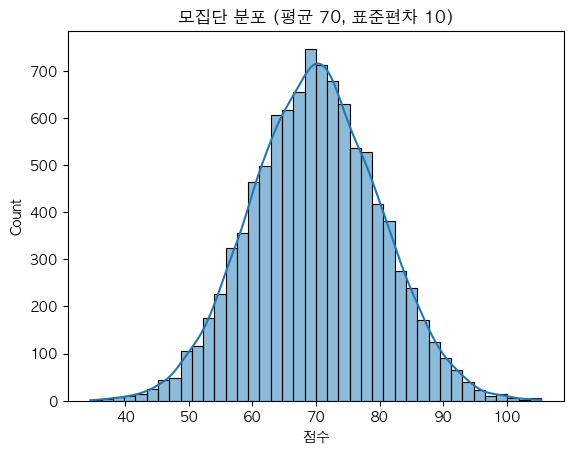

In [14]:
# 모집단 생성
np.random.seed(2025)
population = np.random.normal(loc=70, scale=10, size=10000)

# 모집단 시각화
sns.histplot(population, bins=40, kde=True)
plt.title("모집단 분포 (평균 70, 표준편차 10)")
plt.xlabel("점수")
plt.show()

In [15]:
# Q1. 모집단에서 표본 30명을 무작위로 추출하고, 표본 평균과 표준편차, 표준오차를 구해봅시다.

np.random.seed(2025)
sample = np.random.choice(population, size=30, replace=False)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)  # 표본 표준편차
sample_se = sample_std / np.sqrt(len(sample))  # 표준오차

print(f"표본 평균: {sample_mean:.2f}")
print(f"표본 표준편차: {sample_std:.2f}")
print(f"표준오차: {sample_se:.2f}")

# 여기에 코드 작성

표본 평균: 69.21
표본 표준편차: 7.88
표준오차: 1.44


In [16]:
# Q2. 모집단의 표준편차(σ=10)를 알고 있다고 가정하고, z-분포를 사용하여 95% 신뢰구간을 계산해봅시다.

from scipy.stats import norm

population_std = 10  # 모집단 표준편차(문제에서 명시)
z_critical = norm.ppf(0.975)  # 95% 신뢰수준의 z값 (양쪽 2.5%씩)

margin_of_error = z_critical * (population_std / np.sqrt(len(sample)))
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"95% 신뢰구간 (z-분포, 모집단 표준편차 사용): [{ci_lower:.2f}, {ci_upper:.2f}]")

# 여기에 코드 작성

95% 신뢰구간 (z-분포, 모집단 표준편차 사용): [65.63, 72.78]


In [17]:
# Q3. 모집단의 표준편차를 모른다고 가정하고, 표본 표준편차와 t-분포를 사용하여 95% 신뢰구간을 계산해봅시다.

from scipy.stats import t

df = len(sample) - 1  # 자유도
t_critical = t.ppf(0.975, df)  # 95% 신뢰수준의 t값

margin_of_error_t = t_critical * (sample_std / np.sqrt(len(sample)))
ci_lower_t = sample_mean - margin_of_error_t
ci_upper_t = sample_mean + margin_of_error_t

print(f"95% 신뢰구간 (t-분포, 표본 표준편차 사용): [{ci_lower_t:.2f}, {ci_upper_t:.2f}]")

# 여기에 코드 작성

95% 신뢰구간 (t-분포, 표본 표준편차 사용): [66.27, 72.15]


In [18]:
# Q4. 신뢰수준을 90%, 99%로 바꿔가며 신뢰구간을 계산해보고, 그 폭을 비교해봅시다.

# 신뢰수준별 z-분포 신뢰구간 계산 (모집단 표준편차 사용)
confidence_levels = [0.90, 0.95, 0.99]
z_criticals = [norm.ppf(1 - (1-cl)/2) for cl in confidence_levels]
ci_z = []
for cl, zc in zip(confidence_levels, z_criticals):
    margin = zc * (population_std / np.sqrt(len(sample)))
    lower = sample_mean - margin
    upper = sample_mean + margin
    ci_z.append((cl, lower, upper, upper-lower))
    print(f"{int(cl*100)}% 신뢰구간 (z-분포): [{lower:.2f}, {upper:.2f}], 폭: {upper-lower:.2f}")

print()

# 신뢰수준별 t-분포 신뢰구간 계산 (표본 표준편차 사용)
ci_t = []
for cl in confidence_levels:
    t_crit = t.ppf(1 - (1-cl)/2, df)
    margin = t_crit * (sample_std / np.sqrt(len(sample)))
    lower = sample_mean - margin
    upper = sample_mean + margin
    ci_t.append((cl, lower, upper, upper-lower))
    print(f"{int(cl*100)}% 신뢰구간 (t-분포): [{lower:.2f}, {upper:.2f}], 폭: {upper-lower:.2f}")

# 여기에 코드 작성

90% 신뢰구간 (z-분포): [66.20, 72.21], 폭: 6.01
95% 신뢰구간 (z-분포): [65.63, 72.78], 폭: 7.16
99% 신뢰구간 (z-분포): [64.50, 73.91], 폭: 9.41

90% 신뢰구간 (t-분포): [66.76, 71.65], 폭: 4.89
95% 신뢰구간 (t-분포): [66.27, 72.15], 폭: 5.88
99% 신뢰구간 (t-분포): [65.24, 73.17], 폭: 7.93


### 🧠 데이터를 어떻게 읽을까요?

- z-분포와 t-분포를 사용한 신뢰구간은 얼마나 차이가 있나요?

- 신뢰수준이 높아질수록 신뢰구간의 폭은 어떻게 변하나요? 왜 그럴까요?

- 신뢰구간이 넓다는 건 좋은 걸까요? 나쁜 걸까요?

- 이 데이터가 실제 고객 만족도라면, 신뢰구간 정보를 마케팅 전략에 어떻게 활용할 수 있을까요?


# 문제 5. 미니 프로젝트 - 고객 만족도 신뢰구간 추정


### 📘 문제

- 전체 고객 10,000명을 대상으로 만족도 조사를 하는 것은 시간과 비용이 많이 듭니다.
- 그래서 우리는 무작위로 일부 고객만 조사하여, 전체 고객의 평균 만족도를 추정하려 합니다.

- 이 프로젝트에서는 실제와 같은 상황을 가정하여, 표본을 뽑고 신뢰구간을 계산한 뒤, 이 결과를 바탕으로 마케팅 전략에 어떻게 활용할 수 있을지까지 생각해보는 실습을 진행합니다.


### 📌 아래를 수행해 보세요:

- 모집단을 생성하고, 거기서 표본을 40명 뽑아 평균을 계산해봅시다.

- 표본 평균과 표준편차를 바탕으로 95% 신뢰구간을 계산해봅시다.

- 히스토그램을 그리고 신뢰구간을 시각화해봅시다.

- 이 결과를 어떻게 해석하고, 마케팅 전략에 활용할 수 있을지 생각해봅시다.


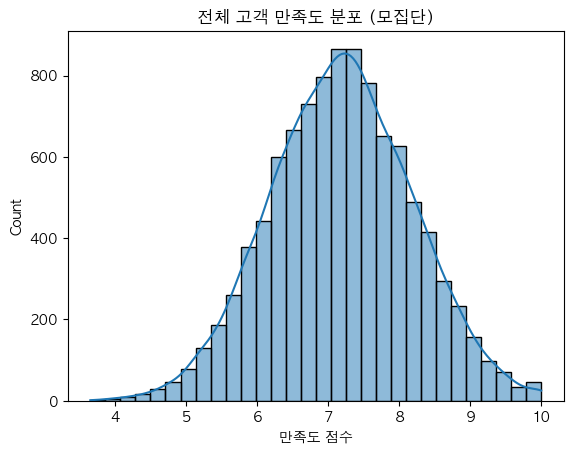

In [19]:
# 모집단 생성 (고객 만족도 10,000명)
np.random.seed(2025)
population = np.random.normal(loc=7.2, scale=1.0, size=10000)
population = np.clip(population, 1, 10)

# 모집단 시각화
sns.histplot(population, bins=30, kde=True)
plt.title("전체 고객 만족도 분포 (모집단)")
plt.xlabel("만족도 점수")
plt.show()

In [20]:
# Q1. 모집단에서 표본 40명을 무작위로 추출하고, 표본 평균과 표준편차를 구해봅시다.

np.random.seed(2025)
sample = np.random.choice(population, size=40, replace=False)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

print(f"표본 평균: {sample_mean:.3f}")
print(f"표본 표준편차: {sample_std:.3f}")

# 여기에 코드 작성

표본 평균: 7.226
표본 표준편차: 0.897


In [21]:
# Q2. 표준오차(SE)를 구하고, t-분포를 사용하여 95% 신뢰구간을 계산해봅시다.

from scipy import stats

# 표준오차(SE) 계산
se = sample_std / np.sqrt(len(sample))

# 자유도
df = len(sample) - 1

# 95% 신뢰구간의 t-값
t_critical = stats.t.ppf(0.975, df)

# 신뢰구간 계산
ci_lower = sample_mean - t_critical * se
ci_upper = sample_mean + t_critical * se

print(f"표준오차(SE): {se:.3f}")
print(f"t-임계값: {t_critical:.3f}")
print(f"95% 신뢰구간: [{ci_lower:.3f}, {ci_upper:.3f}]")

# 여기에 코드 작성

표준오차(SE): 0.142
t-임계값: 2.023
95% 신뢰구간: [6.939, 7.513]


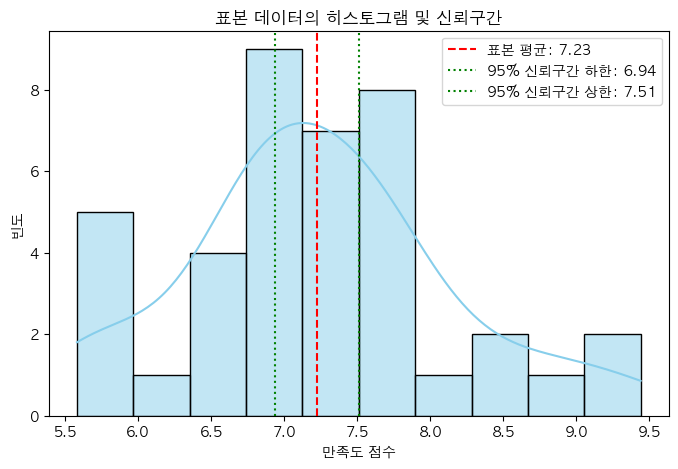

In [22]:
# Q3. 표본 데이터의 히스토그램을 그리고, 평균 및 신뢰구간을 함께 시각화해봅시다.

plt.figure(figsize=(8,5))
sns.histplot(sample, bins=10, kde=True, color='skyblue', edgecolor='black')
plt.axvline(sample_mean, color='red', linestyle='--', label=f'표본 평균: {sample_mean:.2f}')
plt.axvline(ci_lower, color='green', linestyle=':', label=f'95% 신뢰구간 하한: {ci_lower:.2f}')
plt.axvline(ci_upper, color='green', linestyle=':', label=f'95% 신뢰구간 상한: {ci_upper:.2f}')
plt.title("표본 데이터의 히스토그램 및 신뢰구간")
plt.xlabel("만족도 점수")
plt.ylabel("빈도")
plt.legend()
plt.show()

# 여기에 코드 작성

In [23]:
# Q4. 신뢰구간의 결과에 따라 어떤 구체적인 마케팅 전략을 세울 수 있을까요?

# 예시 답변:
# 95% 신뢰구간이 [6.939, 7.513]로 나타났으므로, 모집단의 평균 만족도는 이 구간 내에 있을 가능성이 높습니다.
# 만약 신뢰구간이 우리 회사의 목표 만족도 이상이라면, 현재의 서비스 품질을 유지하면서 긍정적인 고객 경험을 강조하는 마케팅(예: 만족도 기반 광고, 후기 활용 등)을 펼칠 수 있습니다.
# 반대로 신뢰구간이 기대에 못 미친다면, 만족도가 낮은 원인을 분석하여 서비스 개선 캠페인, 타겟 프로모션, 불만족 고객 대상 맞춤형 혜택 제공 등 개선 중심의 마케팅 전략을 세울 수 있습니다.
# 또한 신뢰구간이 너무 넓다면 표본 수를 늘려 신뢰도를 높인 후, 보다 정밀한 타겟팅 전략을 수립하는 것이 좋습니다.

### 🧠 데이터를 어떻게 읽을까요?

- 신뢰구간은 몇 점에서 몇 점 사이인가요?

- 이 구간은 전체 모집단 평균을 포함하고 있나요?

- 이 결과를 바탕으로 고객 만족도가 충분히 높다고 말할 수 있을까요?

- 만약 신뢰구간이 너무 넓게 나왔다면, 그 이유는 무엇이고 어떻게 개선할 수 있을까요?
